#**EDA - Análise Exploratória de Dados com SQL: base de crédito bancário**

##**Os dados:**<br>
Os dados representam informações de clientes de um banco e contam com as seguintes colunas:<br>


*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = número de dependentes do cliente
*   escolaridade = nível de escolaridade do clientes
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo de cartao do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de credito do cliente
*   valor_transacoes_12m = valor das transações dos ultimos 12 meses
*   qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

>A tabela foi criada no AWS Athena junto com o S3 Bucket

##**Exploração de dados**

**Bibliotecas utilizadas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Fonte dos Dados**

In [2]:
!wget -q "https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/dataset/credito.csv" -O credito_raw.csv

**Leitura dos Dados**

In [3]:
dados = pd.read_csv('credito_raw.csv', sep=',')
dados.head(3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


In [4]:
#Total de linhas e colunas
dados.shape

(10127, 16)

In [5]:
#Detalhemento do arquivo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [6]:
#Verificando se há valores nulos
dados.isnull().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

**Tratando os dados para o tipo Float**

In [7]:
dados[['limite_credito','valor_transacoes_12m']].head(3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


In [8]:
dados['limite_credito'] = dados['limite_credito'].apply(lambda valor: valor.replace('.','').replace(',','.')).astype('float')
dados['valor_transacoes_12m'] = dados['valor_transacoes_12m'].apply(lambda valor: valor.replace('.','').replace(',','.')).astype('float')

dados[['limite_credito','valor_transacoes_12m']].head(3)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             10127 non-null  object 
 6   estado_civil             10127 non-null  object 
 7   salario_anual            10127 non-null  object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

In [10]:
dados.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

**Limpeza do arquivo - Excluindo colunas**

In [11]:
dados.drop(columns=['id','default', 'meses_de_relacionamento'], axis=1, inplace=True)

**Exportando nova base de dados**

In [12]:
#base sem cabelhaço
dados.to_csv('base_credito_tratada.csv', index=False, header=False, sep=';')

In [13]:
#base com cabeçalho
dados.to_csv('base_credito_tratada_cabecalho.csv', index=False, sep=';')

##**Análise de Dados**

**As querys foram geradas no AWS Athenas exportadas para CSV e carregadas no Pandas para demonstração dos resultados finais e criação dos gráficos.**

**1 - Qual o total de registros contidos na base de dados?**

>Query: SELECT count(*) AS total_registro FROM credito;

In [14]:
#Resultado
pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-total-registros.csv')

,total_registro
0,10127


**2 - Qual a estrutura de dados da base?**

>Query: DESCRIBE credito;



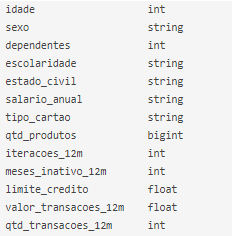

**3 - Qual a  faixa etária dos clientes?**
>Query: <br> SELECT <br>MIN(idade) as idade_min, MAX(idade) as idade_max,<br>
    CAST(AVG(idade) AS int) AS idade_media <br>FROM credito;

In [15]:
#Resultado da query
pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-faixa-etaria.csv', sep=';')

,idade_min,idade_max,idade_media
0,26,73,46


<ipython-input-16-5636ece4e848>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=faixa_etaria, x='idade', width=0.4, palette="Blues")


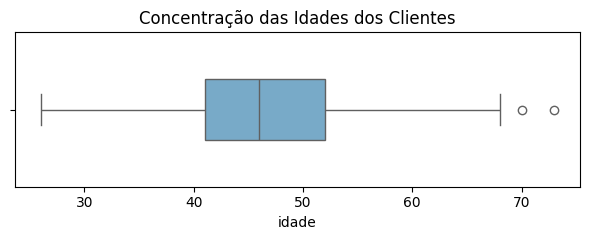

In [16]:
faixa_etaria = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/base_csv/base_credito_tratada_cabecalho.csv', sep=';')
plt.subplots(figsize=(6,2.5))
sns.boxplot(data=faixa_etaria, x='idade', width=0.4, palette="Blues")
plt.title('Concentração das Idades dos Clientes')
plt.tight_layout()
#plt.savefig("fig-idade.png")

**4 - Qual a quantidade de clientes por sexo?**
>Query: <br>SELECT sexo, COUNT(sexo) AS clientes,<br>
    ROUND(COUNT(sexo)/10127.00, 2) * 100 AS porcentagem<br>
FROM credito<br>
GROUP BY sexo;

In [17]:
#Resultado da query
sexo = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-sexo.csv', sep=';')
sexo

,sexo,clientes,porcentagem
0,F,5358,53.0
1,M,4769,47.0


<ipython-input-18-c9807f6eef3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sexo, x='porcentagem', y='sexo', palette="Blues")


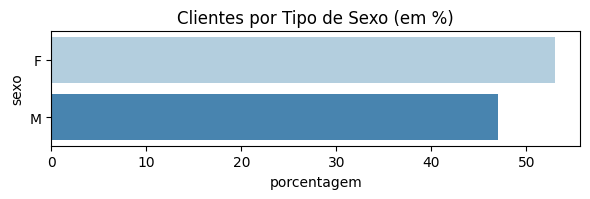

In [18]:
ax = plt.subplots(figsize=(6,2.1))
sns.barplot(data=sexo, x='porcentagem', y='sexo', palette="Blues")
plt.title('Clientes por Tipo de Sexo (em %)')
plt.tight_layout();

**5 - Qual a quantidade de dependentes por clientes?**
>Query: <br> SELECT dependentes, count(dependentes) as total, <br>
    ROUND(COUNT(dependentes)/10127.00, 2) * 100 AS porcentagem<br>
FROM credito<br>
GROUP BY dependentes<br>
ORDER BY dependentes asc;

In [19]:
#Resultado da query
dependentes = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-dependentes.csv', sep=';')

dependentes['dependentes'] = dependentes['dependentes'].astype('string') #convertendo de int para string para o eixo y

dependentes['dependentes'] = dependentes['dependentes'].replace(
    {'0':'Nenhum',
     '1': '1 Dependente',
     '2': '2 Dependentes',
     '3': '3 Dependentes',
     '4': '4 Dependentes',
     '5': '5 Dependentes'
    }
  )

dependentes

,dependentes,total,porcentagem
0,Nenhum,904,9.0
1,1 Dependente,1838,18.0
2,2 Dependentes,2655,26.0
3,3 Dependentes,2732,27.0
4,4 Dependentes,1574,16.0
5,5 Dependentes,424,4.0


<ipython-input-20-b39946015745>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dependentes, x='porcentagem', y='dependentes', palette="Blues")


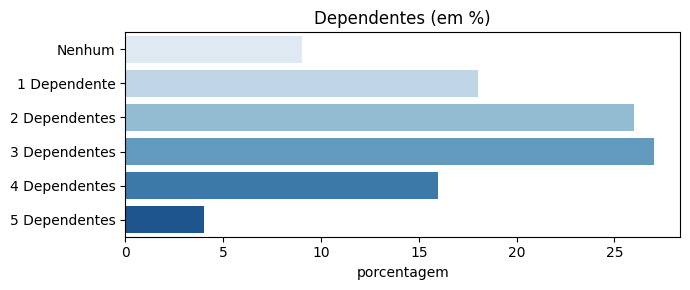

In [20]:
ax = plt.subplots(figsize=(7,3))
sns.barplot(data=dependentes, x='porcentagem', y='dependentes', palette="Blues")
plt.title('Dependentes (em %)')
plt.ylabel('')
plt.tight_layout();

**6 - Qual o nível de escolaridade dos clientes?**
>Query: <br> SELECT escolaridade, count(escolaridade) AS total_registro<br> FROM credito<br>
GROUP BY escolaridade;

In [21]:
#Resultado da query
escolaridade_total = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-escolaridade-total.csv', sep=';')
escolaridade_total['escolaridade'] = escolaridade_total['escolaridade'].replace({'na':'na-(não informado)'})
escolaridade_total

,escolaridade,total_registro
0,mestrado,3128
1,na-(não informado),1519
2,graduacao,1013
3,doutorado,967
4,sem educacao formal,1487
5,ensino medio,2013


>Query: Desconsiderando valores 'NA (não informado)' <br>SELECT<br>
    escolaridade, COUNT(escolaridade) AS quantidade,<br>
    ROUND(COUNT(escolaridade)/8608.00, 2) * 100 AS porcentagem<br>
FROM credito<br>
WHERE escolaridade != 'na'<br>
GROUP BY escolaridade<br>
ORDER BY quantidade desc;

In [22]:
#Resultado da query
escolaridade_sem_na = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-escolaridade-analisado.csv', sep=';')
escolaridade_sem_na

,escolaridade,quantidade,porcentagem
0,mestrado,3128,36.0
1,ensino medio,2013,23.0
2,sem educacao formal,1487,17.0
3,graduacao,1013,12.0
4,doutorado,967,11.0


<ipython-input-23-b8a913e75f19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=escolaridade_sem_na, x='porcentagem', y='escolaridade', palette="Blues")


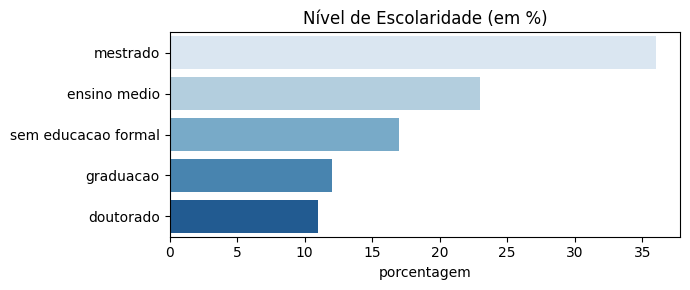

In [23]:
ax = plt.subplots(figsize=(7,3))
sns.barplot(data=escolaridade_sem_na, x='porcentagem', y='escolaridade', palette="Blues")
plt.title('Nível de Escolaridade (em %)')
plt.ylabel('')
plt.tight_layout();

**7 - Qual o estado civil dos clientes?**
>Query:  Desconsiderando valores 'NA (não informado)'<BR>SELECT estado_civil, COUNT(estado_civil) AS quantidade from credito<br>
GROUP BY estado_civil

In [24]:
#Resultado da query
estado_civil_total = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-estado-civil-total.csv', sep=';')
estado_civil_total['estado_civil'] = estado_civil_total['estado_civil'].replace({'na' : 'na-(não informado)'})
estado_civil_total

,estado_civil,quantidade
0,divorciado,748
1,na-(não informado),749
2,solteiro,3943
3,casado,4687


> Query:<br> SELECT estado_civil, COUNT(estado_civil) AS quantidade,<BR>
ROUND(COUNT(estado_civil)/9378.00, 2) * 100 AS porcentagem<BR>
FROM credito<BR>
WHERE estado_civil != 'na'<BR>
GROUP BY estado_civil<BR>
ORDER BY quantidade DESC;


In [25]:
#Resultado da query
estado_civil_analisado = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-estado-civil-analisado.csv', sep=';')
estado_civil_analisado

,estado_civil,quantidade,porcentagem
0,casado,4687,50.0
1,solteiro,3943,42.0
2,divorciado,748,8.0


<ipython-input-26-8c123ddf3178>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estado_civil_analisado, x='porcentagem', y='estado_civil', palette="Blues")


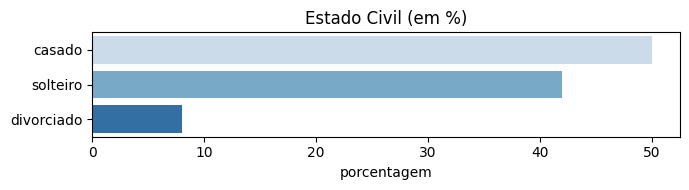

In [26]:
ax = plt.subplots(figsize=(7,2))
sns.barplot(data=estado_civil_analisado, x='porcentagem', y='estado_civil', palette="Blues")
plt.title('Estado Civil (em %)')
plt.ylabel('')
plt.tight_layout();

**8 - Qual a faixa salarial (anual) dos clientes?**
>Query: Desconsiderando valores 'NA (não informado)'<br>SELECT salario_anual, COUNT(salario_anual) AS quantidade_cliente <br>FROM credito<br>
GROUP by salario_anual<br>
ORDER by quantidade_cliente DESC;

In [27]:
#Resultado da query
salario_total = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-salario-total.csv', sep=';')
salario_total['salario_anual'] = salario_total['salario_anual'].replace({'na' : 'na - (não informado)'})
salario_total

,salario_anual,quantidade_cliente
0,menos que $40K,3561
1,$40K - $60K,1790
2,$80K - $120K,1535
3,$60K - $80K,1402
4,na - (não informado),1112
5,$120K +,727


>Query: <br>SELECT salario_anual, COUNT(salario_anual) as quantidade_cliente,<br>
ROUND(COUNT(salario_anual)/9015.00, 2 ) * 100 AS percentual<br>
FROM credito<br>
WHERE salario_anual != 'na'<br>
GROUP by salario_anual<br>
ORDER by quantidade_cliente DESC;

In [28]:
#Resultado da query
salario_analisado = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-salario-analisado.csv', sep=';')
salario_analisado

,salario_anual,quantidade_cliente,percentual
0,menos que $40K,3561,40.0
1,$40K - $60K,1790,20.0
2,$80K - $120K,1535,17.0
3,$60K - $80K,1402,16.0
4,$120K +,727,8.0


<ipython-input-29-6211a21cf104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salario_analisado, x='percentual', y='salario_anual', palette="Blues")


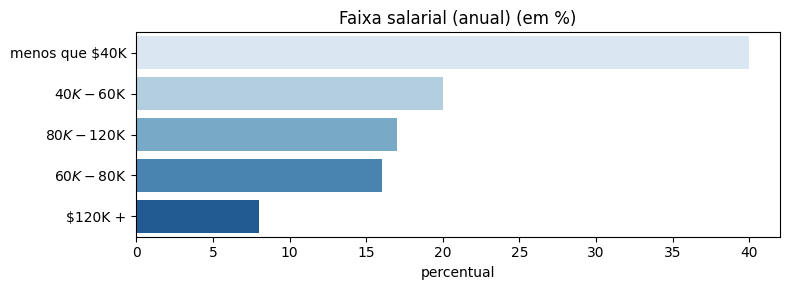

In [29]:
ax = plt.subplots(figsize=(8,3))
sns.barplot(data=salario_analisado, x='percentual', y='salario_anual', palette="Blues")
plt.title('Faixa salarial (anual) (em %)')
plt.ylabel('')
plt.tight_layout();

**9 - Qual a faixa salarial (anual) entre Homens e Mulheres?**

>Query: <br> SELECT sexo, salario_anual,<br>
  COUNT(salario_anual) AS total_clientes<br>
FROM credito<br>
WHERE salario_anual != 'na'<br>
GROUP BY sexo, salario_anual<br>
ORDER BYsalario_anual asc;

In [30]:
#Resultado
salario_h_m = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-salario-h-m.csv', sep=';')
salario_h_m

,sexo,salario_anual,total_clientes
0,M,$120K +,727
1,M,$40K - $60K,776
2,F,$40K - $60K,1014
3,M,$60K - $80K,1402
4,M,$80K - $120K,1535
5,M,menos que $40K,277
6,F,menos que $40K,3284


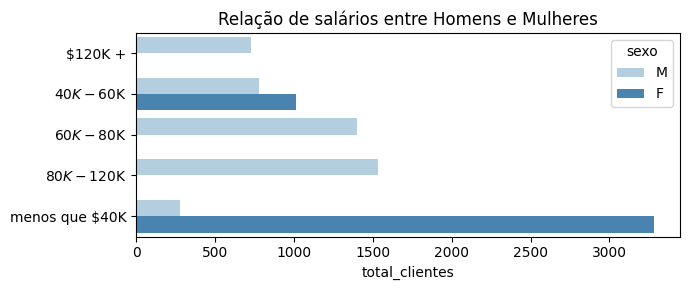

In [31]:
ax = plt.subplots(figsize=(7,3))
sns.barplot(data=salario_h_m, y='salario_anual', x='total_clientes', hue='sexo', palette="Blues")
plt.title('Relação de salários entre Homens e Mulheres')
plt.ylabel('')
plt.tight_layout();

**10 - Qual a modalidade do cartão por clientes?**
>Query: <br>SELECT tipo_cartao, COUNT(tipo_cartao) AS clientes,<br>
    ROUND(COUNT(tipo_cartao)/10127.00*100, 3) AS porcentagem <br>
FROM credito<br>
GROUP BY tipo_cartao<br>
ORDER BY porcentagem DESC;<br>

In [32]:
modalidade_cartao = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-modalidade_cartao.csv', sep=';')
modalidade_cartao

,tipo_cartao,total_clientes,percentual
0,blue,9436,93.177
1,silver,555,5.480
2,gold,116,1.145
3,platinum,20,0.197


<ipython-input-33-0ac96e6f1d68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modalidade_cartao, x='percentual', y='tipo_cartao', palette="Blues")


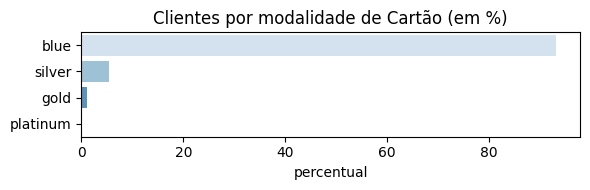

In [33]:
ax = plt.subplots(figsize=(6,2))
sns.barplot(data=modalidade_cartao, x='percentual', y='tipo_cartao', palette="Blues")
plt.title('Clientes por modalidade de Cartão (em %)')
plt.ylabel('')
plt.tight_layout();

**11 - Qual a distribuição dos limites de créditos?**
>Query: <br>SELECT max(limite_credito) as limite_maximo,<br>
min(limite_credito) as limite_minimo,<br>
ROUND(avg(limite_credito), 2) as limite_media<br>
FROM credito

In [34]:
#Resultado
limite_total = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/querys/query-limite-total.csv', sep=';')
limite_total

,limite_maximo,limite_minimo,limite_media
0,34516.99,1438,8632.44


<ipython-input-35-0e668e33e2a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=faixa_etaria, x='limite_credito', width=0.4, palette="Blues")


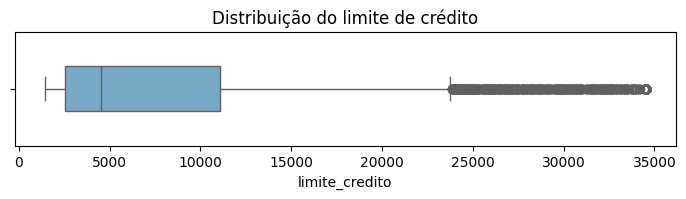

In [35]:
faixa_etaria = pd.read_csv('https://raw.githubusercontent.com/Denesmiranda/portfolio-analista-de-dados/main/eda-sql-credito_bacario/base_csv/base_credito_tratada_cabecalho.csv', sep=';')
plt.subplots(figsize=(7,2.1))
sns.boxplot(data=faixa_etaria, x='limite_credito', width=0.4, palette="Blues")
plt.title('Distribuição do limite de crédito')
plt.tight_layout()

##**Conclusão**

Essas foram **algumas** análises extraídas do dataset de crédito.

**Alguns insights interessantes:*

- Total de clientes analisados na carteira: 10.127;<br>

- Faixa etária entre 26-73 anos. Idade média de 46 anos o que proporciona a empresa diversas ações estratégicas de marketing;<br>

- A quantidade de clientes masculino e feminino é bem aproximado;<br>

- 91% dos clientes possuem ao menos 1 dependente, porém não demonstra influenciar o limite de crédito;<br>

- 59% dos clientes possuem algum tipo de ensino superior, 23% não tem ensino superior e 17% não tem educação formal;<br>

- 50% dos clientes são casados e 42% solteiros;<br>

- 40% dos clientes têm renda menor que 3333,00 reais/mês.<br> 52% têm renda entre 5.000,00 a 10.000,00 reais/mês<br> 8% têm renda maior que 10.000,00 reais/mês;<br>

- Os maiores salários estão concentrados no público masculino e por consequência maior limite de crédito. <br>Os menores salários estão no público feminino.  Não há renda para o público feminino com salários anuais maiores que 60.000,00 reais;<br>

- 93% dos clientes possuem cartão Blue.
<br> 0,2% possuem o Platinum.
<br>Seria necessário entender o porquê do baixo volume na adesão do cartão Platinum. Baixa divulgação? Serviços não atrativos? Taxas muito altas?<br>

- Há diferença expressiva entre o limite mínimo e máximo de cerca de 33.078,99 reais. A mediana para o limite é de 4.549,42 reais.  Há muitos clientes com valores discrepantes (outliers), porém não é algo negativo para a empresa.<br>